In [1]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot

mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34','ana_radio']
############# j=   0                1                       2                      3                       4                  5      6        7
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$',r'$\rm{ANA_{radio}}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########

post_data_model_top={}
i=0
for j in [1, 7]:
    main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    re=bilby.result.read_in_result( fname )
    temp_post=((re.posterior).iloc[:,0:-2]).values 
    
    temp_pos=np.empty_like(temp_post)
    temp_pos[:,0]=temp_post[:,1]
    temp_pos[:,1]=temp_post[:,3]
    temp_pos[:,2]=temp_post[:,0]
    temp_pos[:,3]=temp_post[:,2]
    
    post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])]=temp_pos

In [4]:
post_data_model_top

{'post_ana_corrected_mrms_87_turn_on_pow': array([[ 1.01108621,  0.60432373, 10.5176569 ,  1.9974154 ],
        [ 0.93676511,  0.76077533,  5.39287136,  2.37332265],
        [ 0.95137259,  0.95421562,  7.54000448,  2.36543751],
        ...,
        [ 1.11237628,  0.18684004,  6.15495378,  2.2646449 ],
        [ 1.12100536,  0.16246564,  6.09690446,  2.26757011],
        [ 1.12021467,  0.16616261,  5.92109181,  2.24936989]]),
 'post_ana_radio_turn_on_pow': array([[ 1.00896705,  0.88099356, 21.89915713,  2.21742165],
        [ 0.980017  ,  0.38076789,  5.57325702,  2.1969893 ],
        [ 1.047284  ,  0.6938585 , 21.26812138,  1.93701089],
        ...,
        [ 1.10484403,  0.27141211, 10.60723128,  2.11478999],
        [ 1.10399218,  0.27856343, 11.0056562 ,  2.10330163],
        [ 1.10850232,  0.26368668, 10.52428278,  2.04945899]])}

In [11]:
data_list=list()
slow_top_max_1p9_posts=post_data_model_top["post_"+str(mrms_data_label[6])+'_'+str(sub_model_name_list[0])]
data_list.append(slow_top_max_1p9_posts)
data_list.append(post_data_model_top["post_"+str(mrms_data_label[0])+'_'+str(sub_model_name_list[0])])

In [3]:
import corner.corner
#import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])


#################################
colors=['#ff7f0e','#0072c1']
torf=[False,True]
quans=[[ ],[0.16, 0.84]]
label_fs=16
title_fs=16
ranges=([0.85,1.22],[-0.01,1.15],[-0.05,21],[1.6,3.1])

max_len=max(len(post_data_model_top["post_"+str(mrms_data_label[0])+'_'+str(sub_model_name_list[0])]),\
            len(data_list[0]),len(data_list[1]) )

def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

fig= corner.corner(post_data_model_top["post_"+str(mrms_data_label[2])+'_'+str(sub_model_name_list[0])], #most one you want show
                       bins=20,smooth=0.9,color='k',
                       weights=get_normalisation_weight(len(post_data_model_top["post_"+str(mrms_data_label[2])+'_'+str(sub_model_name_list[0])]), max_len),
                       #labels=[r'$m_{\rm{min}}\,({\rm {M_{\odot}}} ) $',r'$ \delta_m \,({\rm {M_{\odot}}} ) $',
                       #        r'$\alpha$',r'$m_{\rm{max}} \,({\rm {M_{\odot}}} ) $' ],
                       quantiles=[0.16, 0.84],
                       hist_kwargs=dict(ls='--'),
                       hist2d_kwargs=dict(ls='--'),
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=False, plot_datapoints=False, fill_contours=False,
                       label_kwargs=dict(fontsize=label_fs),range=ranges,
                   show_titles=True,title_kwargs={"fontsize": title_fs,"color":'k'}
                  )
for i in range(2):
    fig=corner.corner(data_list[i],  #1st dataset is the most different dataset, 2nd is the data similar to most data
                      fig=fig,
                       bins=20,smooth=0.9,color=colors[i],
                       weights=get_normalisation_weight(len(data_list[i]), max_len),
                       labels=[r'$m_{\rm{min}}\,({\rm {M_{\odot}}} ) $',r'$ \delta_m \,({\rm {M_{\odot}}} ) $',
                               r'$\alpha$',r'$m_{\rm{max}} \,({\rm {M_{\odot}}} ) $' ],
                       #quantiles=quans[i],
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=torf[i], plot_datapoints=False, fill_contours=True,
                       label_kwargs=dict(fontsize=label_fs),range=ranges,
                       hist_kwargs=dict(ls='-'),
                       #show_titles=torf[i], title_kwargs={"fontsize": title_fs,"color":colors[i]}
                     )

k_line= mlines.Line2D([],[],color='k', lw=2,label=r'$\rm{PHE}$')
orange_line= mlines.Line2D([],[],color='#ff7f0e',lw=2,label=r'$\rm{SLOW}$')
blue_line = mlines.Line2D([],[],color='#0072c1', lw=2,label=r'$\rm{OBS}$')#'#0072c1' blue

plt.legend(handles=[k_line,blue_line,orange_line],bbox_to_anchor=(1,4.2),loc='upper right',fontsize=label_fs)#prop={'size': 8})

plt.savefig('phe_obs_slow_top_posteriors.jpg')
plt.show()

KeyError: 'post_ns_obs_turn_on_pow'

# top model with slow & rec

In [2]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot

mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########

post_data_model_top={}
i=0
for j in [3,4,5,6]:
    main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    re=bilby.result.read_in_result( fname )
    temp_post=((re.posterior).iloc[:,0:-2]).values 
    
    temp_pos=np.empty_like(temp_post)
    temp_pos[:,0]=temp_post[:,1]
    temp_pos[:,1]=temp_post[:,3]
    temp_pos[:,2]=temp_post[:,0]
    temp_pos[:,3]=temp_post[:,2]
    
    post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])]=temp_pos

In [7]:
aaa=np.array([1,2,3])
bbb=np.array([10,20,30])
np.concatenate([aaa,bbb])

array([ 1,  2,  3, 10, 20, 30])

In [8]:
np.random.normal(2.6,0.01,5000)

array([2.60385838, 2.59945005, 2.59459596, ..., 2.58503659, 2.60636036,
       2.59357848])

(array([7.000e+00, 6.400e+01, 3.250e+02, 9.020e+02, 1.498e+03, 1.380e+03,
        6.320e+02, 1.720e+02, 1.900e+01, 1.000e+00]),
 array([2.56171989, 2.56969509, 2.5776703 , 2.5856455 , 2.59362071,
        2.60159591, 2.60957112, 2.61754632, 2.62552153, 2.63349673,
        2.64147194]),
 <BarContainer object of 10 artists>)

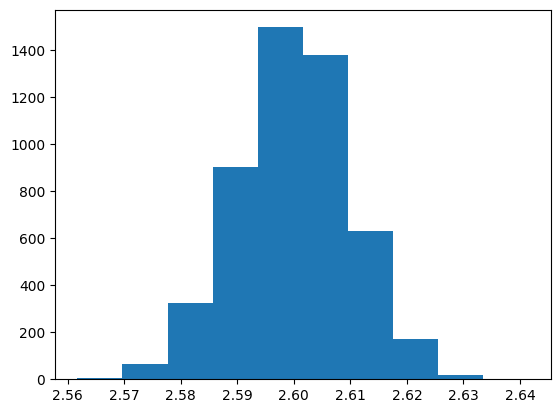

In [11]:
import matplotlib.pyplot as plt
plt.hist(np.random.normal(2.6,0.01,5000))